In [1]:
import sklearn                  # Алгоритмы машинного обучения
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt  # Научная графика
%matplotlib inline

# 0. Описание задачи

## Исходная таблица с данными содержит статистику по сервису Google Play. Необходимо, по значениям признаков узнать платное или бесплатное ли приложение.
### Имена столбцов(признаков)
1. App - название приложения
2. Category - категория приложения 
3. Rating - рейтинг приложения(оценка выставленная пользователями)
4. Reviews - количество отзывов о приложении
5. Size - размер приложения
6. Installs - количество скачиваний приложения
7. Type - платное или бесплатное приложение
8. Price - цена приложения
9. Content Rating - возрастное ограничение
10. Genres - жанр приложения
11. Last Updated - последнее обновление
12. Current Ver - текущая версия приложения
13. Android Ver - версия Android OS, которую поддерживает приложение

# 1. Чтение данных

In [2]:
data_raw = pd.read_csv("./googleplaystore.csv")
data_raw.index

RangeIndex(start=0, stop=10841, step=1)

In [3]:
data_raw.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
data_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data_raw.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Частично произведем обработку данных и выделим категориальные признаки

In [6]:
data_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
data_raw['Category'] = data_raw['Category'].astype('category')
data_raw['Category'] = data_raw['Category'].replace("1.9", np.nan , regex=True)
data_raw['Category'].dtype

CategoricalDtype(categories=['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

In [8]:
data_raw['Reviews'] = data_raw['Reviews'].replace("3.0M", 3000000 , regex=True)
data_raw['Reviews'] = data_raw['Reviews'].astype('float')
data_raw['Reviews'].dtype

dtype('float64')

In [9]:
data_raw['Size'] = data_raw['Size'].replace("Varies with device", np.nan , regex=True)
data_raw['Size'] = data_raw['Size'].str[:-1]
data_raw = data_raw.replace("1,", 1 , regex=True)
data_raw['Size'] = pd.to_numeric(data_raw['Size'])
data_raw['Size'].dtype

dtype('float64')

In [10]:
data_raw['Installs'] = data_raw['Installs'].replace("Free", np.nan , regex=True)
data_raw['Installs'] = data_raw['Installs'].apply(lambda v: float(str(v).replace("+","").replace(",","")))
data_raw['Installs'] = data_raw['Installs'].astype('float')
data_raw['Installs'].dtype

dtype('float64')

In [11]:
data_raw['Type'] = data_raw['Type'].astype('category')
data_raw['Type'] = data_raw['Type'].replace("0", "Free" , regex=True)
data_raw['Type'].dtype

CategoricalDtype(categories=['0', 'Free', 'Paid'], ordered=False)

In [12]:
data_raw['Price'] = data_raw['Price'].replace("Everyone", 0, regex=True)
data_raw['Price'] = data_raw['Price'].apply(lambda v: float(str(v).replace("$","")))
data_raw['Price'].dtype

dtype('float64')

In [13]:
data_raw['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [14]:
data_raw['Content Rating'] = data_raw['Content Rating'].apply(lambda v: str(v).replace("Adults only 18+","18").replace("Mature 17+","18").replace("Teen","6").replace("Unrated","0").replace("Everyone","0").replace("0 10+", "10"))
data_raw['Content Rating'] = data_raw['Content Rating'].astype('float')
data_raw['Content Rating'].dtype

dtype('float64')

In [15]:
data_raw['Genres'] = data_raw['Genres'].astype('category')
data_raw['Genres'].dtype

CategoricalDtype(categories=[                                      1,
                                                 'Action',
                              'Action;Action & Adventure',
                                              'Adventure',
                           'Adventure;Action & Adventure',
                                  'Adventure;Brain Games',
                                    'Adventure;Education',
                                                 'Arcade',
                              'Arcade;Action & Adventure',
                                    'Arcade;Pretend Play',
                  ...
                                        'Tools;Education',
                                         'Travel & Local',
                      'Travel & Local;Action & Adventure',
                                                 'Trivia',
                                       'Trivia;Education',
                                'Video Players & Editors',
                     'V

# Обработка пропущенных значений

In [16]:
data_raw.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Удалим строки в которых содержится малое количество незаполненных значений

In [17]:
data_na = data_raw.copy()
data_na.drop_duplicates(subset='App', inplace=True)
data_na.dropna(axis=0, how="all", subset=['Android Ver'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Category'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Current Ver'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Type'], inplace=True)

In [18]:
data_na.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size              1226
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

## С остальными пропущенными значениями будем пытаться путем заполнения их средним значением немного позже(после избавления от выбросов)

## Столбцы с версией приложения и андроида исключим из дальнейшего анализа, так же исключим названия приложений

In [19]:
del data_na['Android Ver']
del data_na['Current Ver']
del data_na['App']
del data_na['Last Updated']

# Избавляемся от выбросов

## Для начала построим графики зависимостей, чтобы оценить количество выбросов

Text(0, 0.5, 'Rating')

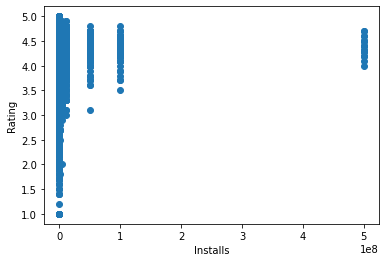

In [20]:
plt.scatter(data_na['Installs'], data_na['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

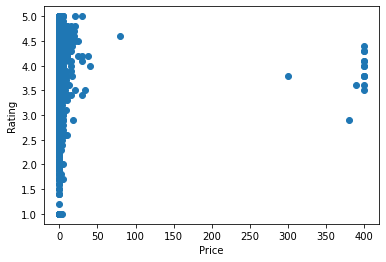

In [21]:
plt.scatter(data_na['Price'], data_na['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

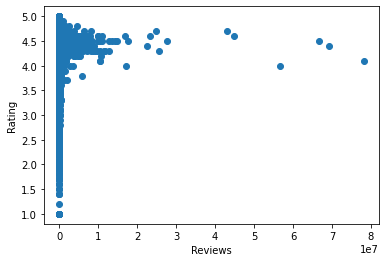

In [22]:
plt.scatter(data_na['Reviews'], data_na['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')

Text(0, 0.5, 'Price')

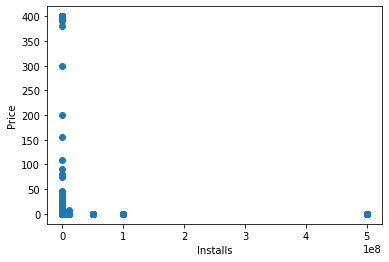

In [23]:
plt.scatter(data_na['Installs'], data_na['Price'])
plt.xlabel('Installs')
plt.ylabel('Price')

Text(0, 0.5, 'Reviews')

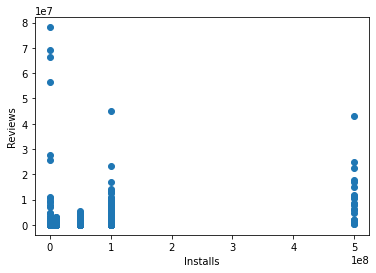

In [24]:
plt.scatter(data_na['Installs'], data_na['Reviews'])
plt.xlabel('Installs')
plt.ylabel('Reviews')

Text(0, 0.5, 'Reviews')

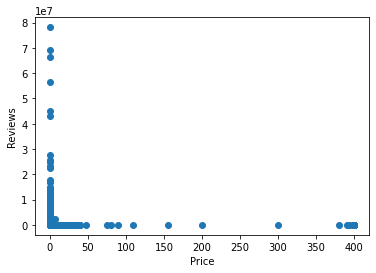

In [25]:
plt.scatter(data_na['Price'], data_na['Reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')

Text(0, 0.5, 'Size')

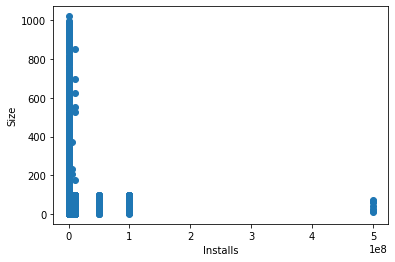

In [26]:
plt.scatter(data_na['Installs'], data_na['Size'])
plt.xlabel('Installs')
plt.ylabel('Size')

In [27]:
data_na['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05      0.00
0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.70      0.00
0.90      0.00
0.95      1.99
1.00    400.00
Name: Price, dtype: float64

In [28]:
data_na['Installs'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005            1.0
0.100            1.0
0.200            1.0
0.300           50.0
0.400          500.0
0.500        10000.0
0.700       100000.0
0.800      5000000.0
0.900     10000000.0
0.950     10000000.0
0.960     50000000.0
0.980    100000000.0
1.000    500000000.0
Name: Installs, dtype: float64

In [29]:
data_na['Size'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05       2.1
0.10       2.9
0.20       4.3
0.30       6.5
0.40       9.5
0.50      14.0
0.70      27.0
0.90      62.0
0.95      91.0
0.98     364.0
1.00    1020.0
Name: Size, dtype: float64

In [30]:
data_na['Reviews'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05           0.00
0.10           2.00
0.20          12.00
0.30          52.00
0.40         218.00
0.50         969.50
0.70       16412.00
0.90      223414.50
0.95      646187.75
0.98     2056387.30
1.00    78158306.00
Name: Reviews, dtype: float64

### Избавимся от строк с большими: ценой, размером, количеством установок, а так же от приложений, которые вообще не устанавливали.

In [31]:
rows_to_drop = data_na[
    (data_na['Price'] > data_na['Price'].quantile(0.995)) | 
    (data_na['Size'] > data_na['Size'].quantile(0.995)) | 
    (data_na['Installs']  > data_na['Installs' ].quantile(0.95)) |
    (data_na['Installs'] == 0)].index
data_na = data_na.drop(rows_to_drop)
data_na.shape

(9132, 9)

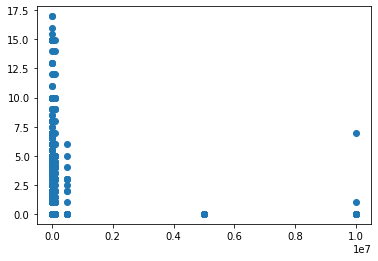

In [32]:
plt.scatter(data_na['Installs'], data_na['Price'])

## После избавления от выбросов можем заполнить некоторые пропущенные значения средним.

In [33]:
data_na.isna().sum()

Category             0
Rating            1416
Reviews              0
Size              1027
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

Т. к. пропущенных значений все так же много, то заполним их при помощи медианны.

In [34]:
col = ["Rating", "Size"]
data_na.fillna(data_na[col].median(axis = 0), axis=0 , inplace=True)
data_na.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# Визуализация

In [35]:
data_na.describe()

,Rating,Reviews,Size,Installs,Price,Content Rating
count,9132.000000,9.132000e+03,9132.000000,9.132000e+03,9132.000000,9132.000000
mean,4.185425,9.261476e+04,30.045127,1.401985e+06,0.271855,1.698423
std,0.504616,1.506804e+06,76.008653,3.158007e+06,1.247065,4.190480
min,1.000000,0.000000e+00,1.000000,1.000000e+00,0.000000,0.000000
25%,4.000000,2.200000e+01,5.900000,1.000000e+00,0.000000,0.000000
50%,4.300000,7.515000e+02,13.000000,1.000000e+04,0.000000,0.000000
75%,4.500000,2.123275e+04,27.000000,1.000000e+05,0.000000,0.000000
max,5.000000,7.815831e+07,862.000000,1.000000e+07,16.990000,18.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получил информацию о категориальных:

In [36]:
data_na.describe(include=['category'])

,Category,Type,Genres
count,9132,9132,9132
unique,33,2,118
top,FAMILY,Free,Tools
freq,1772,8442,767


## Заново построим некоторые графики и более подробно их рассмотрим. 

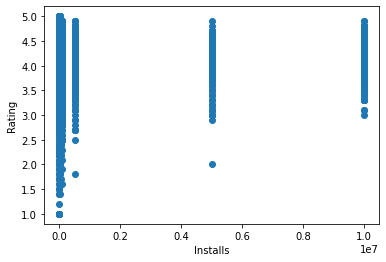

In [37]:
plt.scatter(data_na['Installs'], data_na['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')
pass

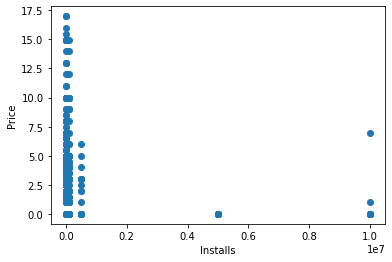

In [38]:
plt.scatter(data_na['Installs'], data_na['Price'])
plt.xlabel('Installs')
plt.ylabel('Price')
pass

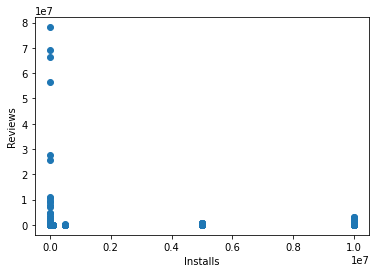

In [39]:
plt.scatter(data_na['Installs'], data_na['Reviews'])
plt.xlabel('Installs')
plt.ylabel('Reviews')
pass

Text(0, 0.5, 'Rating')

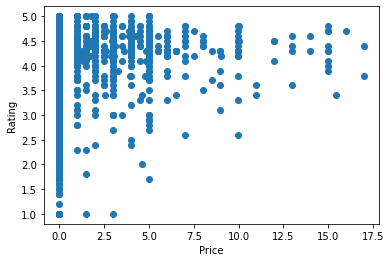

In [40]:
plt.scatter(data_na['Price'], data_na['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')

Text(0, 0.5, 'Reviews')

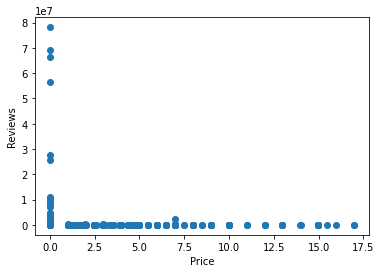

In [41]:
plt.scatter(data_na['Price'], data_na['Reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')

Text(0, 0.5, 'Rating')

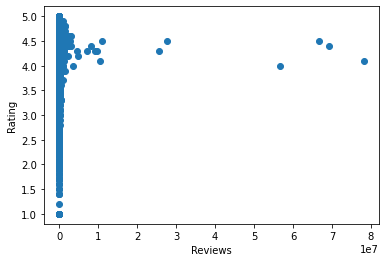

In [42]:
plt.scatter(data_na['Reviews'], data_na['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')

### Из полученных графиков можно сказать, что нет четкой зависимости между ценой и количеством скачиваний, ценой и оценкой и т.д, т.е. зависимость величин друг от друга достаточно низкая.
### Но можно заметить, что есть особенности:
    1. У приложений, которые скачивали большое количство раз оценка больше 3.5
    2. У приложений с большим количеством отзывов оценка выше
    3. У бесплатных(дешевых) оценка может быть любой
    4. Приложения у которых стоймость больше рейтинг выше.

## Построим график цены от количества скачиваний с учетом категории приложений

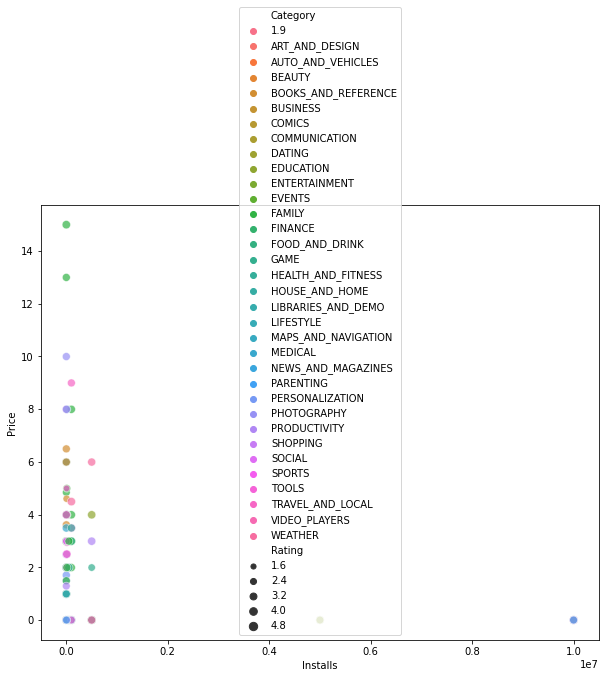

In [43]:
random_subset = np.random.choice(np.arange(data_na.shape[0]), size=1000, replace=False)

plt.figure(figsize = (10, 8))
sns.scatterplot(x='Installs', y='Price', hue='Category', size='Rating', data=data_na.iloc[random_subset], alpha=0.7, legend="auto")
plt.legend()

## Достаточно проблематично понять зависимость из-за большого количества категорий приложения и проблематично понять какой жанр наиболее популярен.

Построим все диаграммы рассеивания:

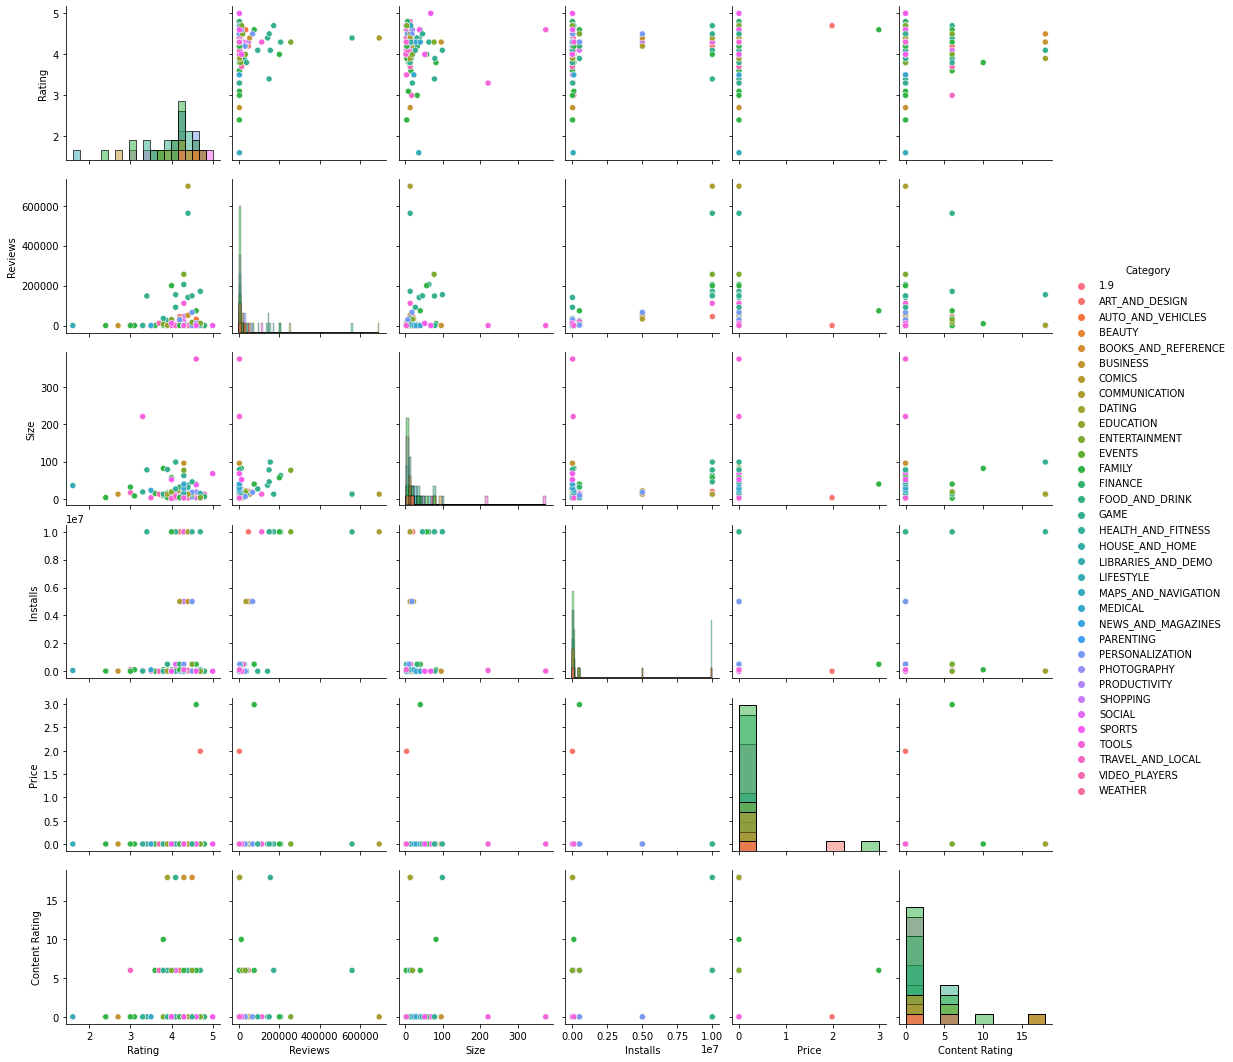

In [44]:
random_subset = np.random.choice(np.arange(data_na.shape[0]), size=100, replace=False)
sns.pairplot(data_na.iloc[random_subset], hue='Category', diag_kind='hist')

## Построим матрицу корреляции, чтобы убедиться в наших предположениях.

In [45]:
data_na.corr()

,Rating,Reviews,Size,Installs,Price,Content Rating
Rating,1.000000,0.018454,-0.019876,0.080907,0.030684,-0.004202
Reviews,0.018454,1.000000,-0.004441,0.055288,-0.011591,0.023473
Size,-0.019876,-0.004441,1.000000,-0.003166,0.019916,-0.009977
Installs,0.080907,0.055288,-0.003166,1.000000,-0.092764,0.071136
Price,0.030684,-0.011591,0.019916,-0.092764,1.000000,-0.009999
Content Rating,-0.004202,0.023473,-0.009977,0.071136,-0.009999,1.000000


<AxesSubplot: >

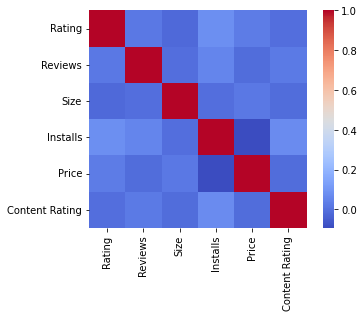

In [46]:
sns.heatmap(data_na.corr(), square=True, cmap='coolwarm')

### Как было отмеченно раннее, признаки слабо коррелируют друг с другом, что видно из построенных таблиц.

## Рассмотрим соотношение бесплатных и платных приложений

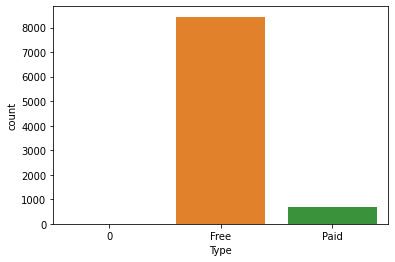

In [47]:
sns.countplot(x='Type', data=data_na)
pass

Наблюдаем преобладание класса бесплатных приложений над платными.

# Обработка категориальных признаков

In [48]:
data_na['Genres'].unique()

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', ..., 'Role Playing;Brain Games', 'Strategy;Education', 'Racing;Pretend Play', 'Communication;Creativity', 'Strategy;Creativity']
Length: 118
Categories (120, object): [1, 'Action', 'Action;Action & Adventure', 'Adventure', ..., 'Video Players & Editors;Creativity', 'Video Players & Editors;Music & Video', 'Weather', 'Word']

### Слишком большое количество категорий, лучше будет отказаться от данного признака.

In [49]:
del data_na['Genres']

In [50]:
data_na['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (34, object): ['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

### К категориальному (небинарному) признаку `'Category'` применим метод *бинаризации* (*one-hot encoding*).


In [51]:
dummies = pd.get_dummies(data_na['Category'])

In [52]:
dummies.head()

,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data_na = pd.concat((data_na, dummies), axis=1)
data_na = data_na.drop(['Category'], axis=1)

In [54]:
data_na['Type'].unique()

['Free', 'Paid']
Categories (3, object): ['0', 'Free', 'Paid']

## Бинарный признак заменим на числовой

In [55]:
data_na['Type'] = pd.factorize(data_na['Type'])[0]

In [56]:
data_na.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159.0,19.0,10000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.0,500000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.7,5000000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.8,100000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5.6,50000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Нормализация

### Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку $[0; 1]$.

In [57]:
data_na = (data_na - data_na.min(axis=0)) / (data_na.max(axis=0) - data_na.min(axis=0))

In [58]:
data_na.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,9132.000000,9.132000e+03,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,0.0,9132.000000,9132.000000,...,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,0.796356,1.184964e-03,0.033734,0.140198,0.075558,0.016001,0.094357,NaN,0.006680,0.009198,...,0.039093,0.026172,0.037232,0.020696,0.024201,0.034275,0.084100,0.023106,0.015988,0.008213
std,0.126154,1.927887e-02,0.088280,0.315801,0.264305,0.073400,0.232804,NaN,0.081461,0.095472,...,0.193828,0.159654,0.189339,0.142374,0.153680,0.181945,0.277553,0.150247,0.125435,0.090257
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,2.814800e-07,0.005691,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.825000,9.615101e-06,0.013937,0.001000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,2.716634e-04,0.030197,0.010000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Разбиваем данные на обучающую и тестовую выборки

In [59]:
data_na.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', '1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE',
       'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
       'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object')

### Для предсказания будем использовать все выходные признаки не связанные с ценой 

In [60]:
X = data_na.drop(['Type', 'Price'], axis=1)
y = data_na['Type']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

N_train, N_test

(6849, 2283)

# Классификация

In [62]:
from sklearn.metrics import accuracy_score, mean_squared_error

## KNeighborsClassifier

## 5 Соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9297707694553949, test 0.9194042925974595
Mean-squared error: train 0.07022923054460505, test 0.08059570740254052


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9297707694553949, test 0.9194042925974595
Mean-squared error: train 0.07022923054460505, test 0.08059570740254052


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9297707694553949, test 0.9194042925974595
Mean-squared error: train 0.07022923054460505, test 0.08059570740254052


## 10 Соседей

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9246605343845817, test 0.9290407358738502
Mean-squared error: train 0.07533946561541831, test 0.07095926412614981


## 3 Соседа

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9410132866111841, test 0.9141480508103372
Mean-squared error: train 0.058986713388815885, test 0.08585194918966273


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9975178858227478, test 0.9312308366184845
Mean-squared error: train 0.0024821141772521536, test 0.06876916338151555


## Предположение

### Такая высокая точность для алгоритмов в нашем случае может быть вызвана несбалансированностью классов, т к строчек с значением Free >> Paid

# Выводы

### 1. При классификации при помощи алгоритма "KNN" при изменении количества соседей точность предсказаний немного увеличивалась при большем количестве соседей.
### 2. При классификации при помощи алгоритма "Random Forest" точность предсказания возрасла в сравнении с "KNN".

# Вторая часть

# 1. Чтение данных

Загружаем обработанные данные из прошлой лабораторной работы

In [64]:
data = pd.read_csv("googlepalystory_obr.csv")
data.shape

(9132, 40)

In [65]:
data['Type'] = data['Type'].astype('bool')
data['Type'] 

0       False
1       False
2       False
3       False
4       False
        ...  
9127    False
9128    False
9129    False
9130    False
9131    False
Name: Type, Length: 9132, dtype: bool

In [66]:
X = data.drop(['Type', 'Price'], axis=1)
y = data['Type']

# 2. Разбиение датасета на обучающую и тестовую выборки

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 45)
N_test, _ = X_test.shape

In [68]:
from sklearn.neural_network import MLPClassifier

# 3. Создание модели и ее обучение

In [69]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=1000,
                          random_state = 30)

In [70]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 9.97 s
Wall time: 4.61 s


MLPClassifier(max_iter=1000, random_state=30)

In [71]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [72]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.07293035479632064 0.07774857643451599


# 4. Подбор оптимального альфа

In [73]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 3, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

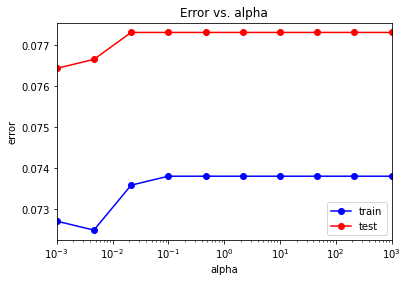

In [74]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

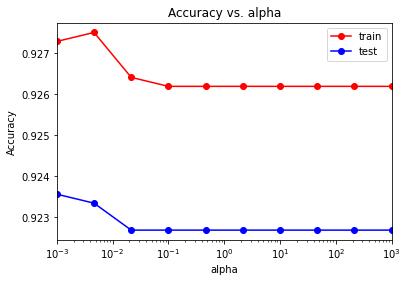

In [75]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

При малых значениях альфа видимо небольшое небольшое падение точности на тестовой выборке. 

Из анализа графиков точности от альфа видим, что не происходит переобучения, т.к. точность на тестовой выборке лучше чем на тренировочной, так же не наблюдается недообучения. При переходе от одного значеняи к другому видим малое измениние точности в зависимости от коэфициента.

In [76]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07249233464739378 0.07643451598773543


In [77]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001]


In [78]:
alpha_opt = alpha_opt[0]
alpha_opt

0.001

In [79]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 5. Подбор оптимального числа нейронов

In [80]:
neuron_arr = np.linspace(10, 100, 10).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

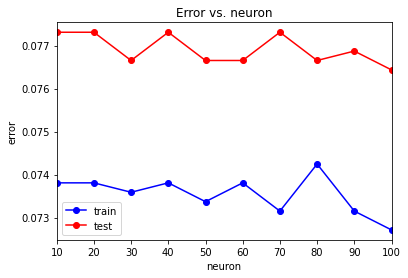

In [81]:
plt.plot(neuron_arr, train_err, 'b-o', label = 'train')
plt.plot(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()

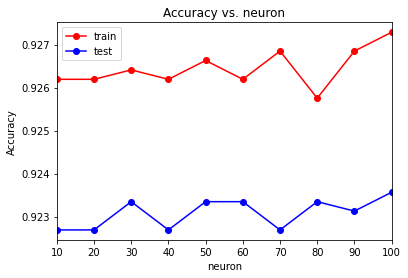

In [82]:
plt.plot(neuron_arr, train_acc, 'r-o', label = 'train')
plt.plot(neuron_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

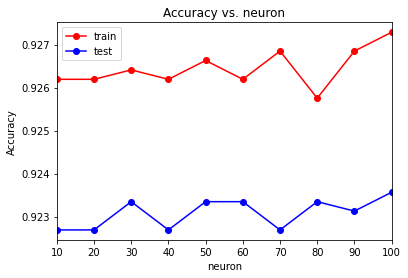

In [83]:
plt.plot(neuron_arr, train_acc, 'r-o', label = 'train')
plt.plot(neuron_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

Аналогично, с при подборе оптимального количества нейронов не происходит переобучения или недообучения, а так же видим малое изменение точности. Оптимальным количеством нейронов для нашего случая являеется 20.

In [84]:
neuron_opt = neuron_arr[test_err == min_test_err]
print(neuron_opt)

[100]


In [85]:
neuron_opt = neuron_opt[0]

In [86]:
neuron_opt

100

In [87]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 6. Подбор оптимального числа нейронов и альфа

In [88]:
neuron_arr = np.linspace(10, 100, 5).astype(int)
alpha_arr = np.logspace(-3, 3, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
pars_arr = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron,), 
                                  solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
    
        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        pars_arr.append([neuron, alpha])
        
       

In [89]:
pars_arr

[[10, 0.001],
 [10, 0.03162277660168379],
 [10, 1.0],
 [10, 31.622776601683793],
 [10, 1000.0],
 [32, 0.001],
 [32, 0.03162277660168379],
 [32, 1.0],
 [32, 31.622776601683793],
 [32, 1000.0],
 [55, 0.001],
 [55, 0.03162277660168379],
 [55, 1.0],
 [55, 31.622776601683793],
 [55, 1000.0],
 [77, 0.001],
 [77, 0.03162277660168379],
 [77, 1.0],
 [77, 31.622776601683793],
 [77, 1000.0],
 [100, 0.001],
 [100, 0.03162277660168379],
 [100, 1.0],
 [100, 31.622776601683793],
 [100, 1000.0]]

In [90]:
test_err

[0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07665352606219886,
 0.07665352606219886,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07665352606219886,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07643451598773543,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914]

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07271134472185721 0.07643451598773543


In [92]:
i, = np.where(test_err == min_test_err)
neuron_opt, alpha_opt = pars_arr[i[0]]
print(neuron_opt, alpha_opt)

100 0.001


In [93]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 7. Выводы
    При всех попытках подбора коэфициентов и количества нейронов получали малое изменение точности, следовательно, никакой явной зависимости точности от этих параметров(в нашем случаем можем сказать, что коэффициенты почти не влияют на точность). Так же не наблюдали переобучения или недообучения. Во всех рассмотренных случаях решение задачи классификации получалось с большой точностью.

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_test_pred))

[[4210    3]
 [ 346    7]]


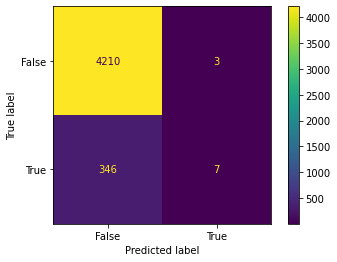

In [95]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()